In [3]:
import pandas as pd
data = pd.read_csv("../../sensor_data/sensor_data_200.txt",delimiter=" ",header=None,names=("data","time","ir","lidar"))
data

,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [4]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


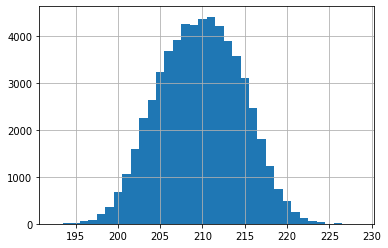

In [5]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), align="left")
plt.show()

In [6]:
mean1=sum(data["lidar"].values)/len(data["lidar"].values)
mean2=data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


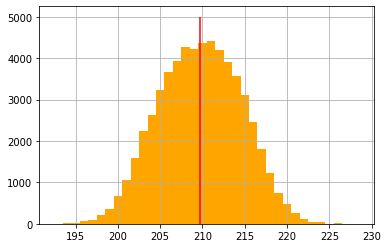

In [7]:
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),color="orange",align="left")
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [8]:
# 定義から計算
zs=data["lidar"].values
mean=sum(zs)/len(zs)
diff_square=[(z-mean)**2 for z in zs]

sampling_var=sum(diff_square)/(len(zs))#標本分散
unbiased_var=sum(diff_square)/(len(zs)-1)#不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var=data["lidar"].var(ddof=False)# 標本分散
pandas_default_var=data["lidar"].var() # デフォルト(不偏分散)

print(pandas_sampling_var)
print(pandas_default_var)

# Numpyを使用
import numpy as np
numpy_default_var=np.var(data["lidar"])#デフォルト(標本分散)
numpy_unbiased_var=np.var(data["lidar"],ddof=1)#不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


In [9]:
# 標準偏差を算出
import math

# 定義から計算

stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用
pandas_stddev=data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729


標準偏差を使うともとのデータがどれくらいばらついいるかを説明できる。
分散の次元はもとのセンサー値の2乗になっているが、標準偏差は平方根を撮っているのでもとのセンサー値と次元が揃う。
例えば、今回の場合
平均値が209.7[mm]で標準偏差が4.8[mm]ばらつくということになり
209.7±4.8[mm]
と表記できる。

# 2.2.4 （素朴な）確率分布

今度はセンサー値のリスト（0からN-1回まで）からN回目以降に採取されるセンサー値がどうなるか予測する問題を考えてみる。

もし実験の条件が変わっていなければ、変数dataのヒストグラムで頻度の大きなところが出やすいと予測される。この値の出やすさを数値化したものを確率と呼ぶ。例えば、「センサー値xがN回目にP(x)の確率で出る」といった場合、「N回目のセンサー値の採取」を仮に100回やったら100P(x)回出るだろうということを意味する。

ここでは厳密に確率を定義せずに、0回目からN-1回目までに記録されたセンサー値にある値がｍ個含まれていたら、その値が出る確率をP(z)=m/Nと考える

In [10]:
# value_countでlidar列の各センサー値の頻度を数えてそれをデータフレームにする
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()# 横向きに出力する

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [11]:
# lidar列に入っている値を要素数で割ることで、頻度の割合を算出
# P(z)=m/N
freqs["probs"]=freqs["lidar"]/len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


上記の表の説明

列: 距離値

lidar行：各距離値の出現数

probs行：各距離値の出現数の割合。全距離値の合計が1になる

In [12]:
sum(freqs["probs"])

1.0

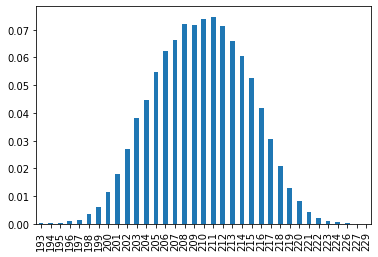

In [13]:
freqs["probs"].sort_index().plot.bar()
plt.show()

縦軸が確率に変わったグラフができた。
これは個別の確率$P(z)$を与える関数$P$全体を描いたもの。各変数$z$における確率を表したもの。
この関数は確率質量関数と呼ばれる。

$P:$確率分布＝Pは関数とも言えるので確率質量関数と呼ばれる。

$P(z):$確率分布における変数zの確率

このように関数$P$に確率変数zを与えてその確率が帰って来る場合、その関数$P$は確率質量関数と呼ばれる。

確率質量関数は確率変数が離散型の場合にのみ適用される。

確率分布はなんでも$P$で表すことが多いが、さまざまな確率分が数式に登場すると区別を付けたくなる。その場合は変数を明記して$P(z)$と表記したり、由来を右下に付けて$P_{zLiDAR}$と表現したりする。

確率分布が求めると、ソフトウェアでセンサー値の発生をシミュレーションできるようになる。

In [14]:
# 確率分布から値を生成する簡単な例
def drawing():
    # データフレームfreqsのprobs列から1つ値をドローする
    return freqs.sample(n=1,weights="probs").index[0]

drawing()

216

上記の処理は数式上では$z_n{\sim}P_{zLiDAR}$と表現する。
$z_n$は実際に選ばれた値を表す。
この処理を確率分布から値をドローすると呼ぶ。
似た言葉にサンプリングがある。
ドロー＝個々のものを抽出する。
サンプリング＝母集団から集団の一部を抽出することを指す。

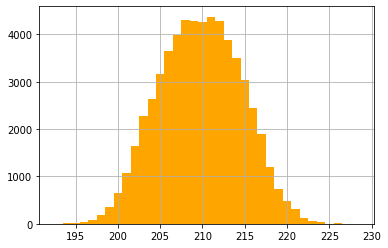

In [27]:
# dataの要素数だけドローを行う。
samples=[drawing() for i in range(len(data))]
# ドローした結果をヒストグラム化
simulated=pd.DataFrame(samples,columns=["lidar"])
p=simulated["lidar"]
p.hist(bins=max(p)-min(p),color="orange",align="left")
plt.show()

## 2.3 確率モデル

### 2.3.1 ガウス分布の当てはめ

センサー値のばらつきがガウス分布に従っていると考る。

ガウス分布は例えばセンサーの値zがa以上b未満に入る確率を以下の式で表す。

$$
式(2.7) \qquad P(a{\leq}z<b)=\int_{a}^{b}p(z)dz   \\
式(2.8) \qquad p(z)=\frac{1}{\sqrt{{2}{\pi}{\sigma}^2}}\exp{\Biggl(-\frac{(z-\mu)^2}{2\sigma^2}\Biggr)}
$$

$p(z)$は変数zがガウス分布に従った場合の確率

In [16]:
def p(z,mu=209.7,dev=23.4):
    # 式(2.8)
    return math.exp(-(z-mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

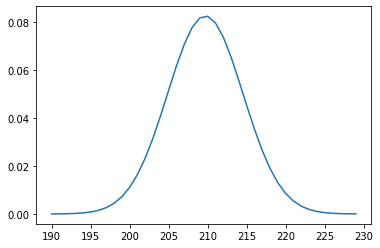

In [17]:
zs=range(190,230)
ys=[p(z) for z in zs]
plt.plot(zs,ys)
plt.show()

pを積分して、センサー値が整数に限定される場合の確率分布を作ってみる。[br]
センサー値xに対して、区間`[x-0.5,x+0.5)]`の範囲で積分する[br]
ただし、式(2.8)は簡単に積分できないのでここで台形公式で近似する。

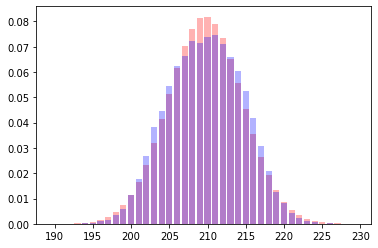

In [25]:
# 台形公式で確率を求める関数
def prob(z, width=0.5):
    # 台形公式=(f(x)+f(x+h))*h/2
    # 以下の式を見ると、標準の台形公式ではない？微分の中心差分に似た書き方をしている。
    return width*(p(z-width)+p(z+width))

zs=range(190,230)
ys=[prob(z) for z in zs]
plt.bar(zs, ys, color="red", alpha=0.3)
# 比較のためにセンサー値の頻度から求めた確率を棒グラフで描画
f=freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()

ガウス分布は$\mu,\sigma^2$を決めると形状が決まってしまうので、式を記述する必要がなければ

$$
\Nu(z|\mu, \sigma^2)あるいは\Nu(\mu,\sigma^2)
$$

などと省略される。

このようにある現象を説明するために適切な確率分布の数式を持ってきてパラメータを求めることはモデル化と呼ばれる。またモデル化で分布を当てはめられる数式は確率モデルと呼ばれる。

## 2.3.2 確率密度関数

式(2.8)の関数はガウス分布の確率密度関数(probability density function:pdf)と呼ばれる。確率密度関数は積分すると確率になる関数で、その値は密度と呼ばれる。

確率変数が連続型の場合にのみ適用される。

連続型なので確率質量関数のように確率変数を指定しても確率は0しか帰らない。例えば、センサー値が実数の場合、値がピッタリ200になるような確率はゼロ。そのため確率は式(2.7)のように、値の範囲に対して与える。

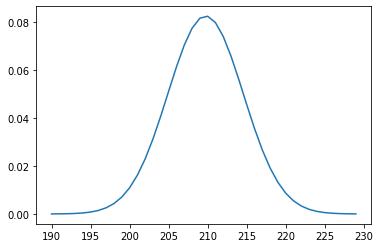

In [19]:
from scipy.stats import norm

zs = range(190,230)
# norm.pdf=確率密度関数を求める
ys=[norm.pdf(z,mean1,stddev1) for z in zs]

plt.plot(zs, ys)
plt.show()

変数zが実数のとき、確率密度分布pを次のように積分したものは、累積分布関数(cumulative distribution function, cdf)と呼ぶ

$$
式(2.11) \qquad P(z<a)=\int_{-\infty}^{a}p(z)dz
$$

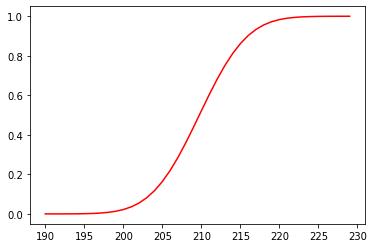

In [20]:
zs = range(190, 230)
# norm.cdf=累積分布関数
ys=[norm.cdf(z,mean1,stddev1) for z in zs]
plt.plot(zs,ys,color="red")
plt.show()

さきほど、台形公式で実装した式(2.7)の確率の計算は

$$
P(a{\leq}z<b)=\int_{a}^{b}p(z)dz \\
             =\int_{-\infty}^{b}p(z)dz - \int_{-\infty}^{a}p(z)dz \\
             =P(z<b) - P(z<a) 式(2.12)
$$

と、確率の差に置き換えることができる。この式（2.12)を使って確率分布を描画すると以下のようになる。

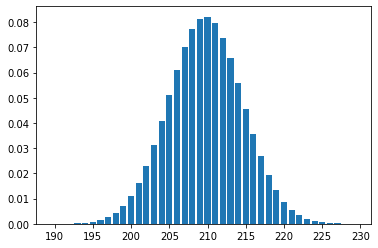

In [26]:
# 累積分布関数を確率質量関数のように描画
zs=range(190,230)
ys=[norm.cdf(z+0.5,mean1,stddev1)-norm.cdf(z-0.5,mean1,stddev1) for z in zs]
plt.bar(zs,ys)
plt.show()

確率密度関数は、確率質量関数が大文字Pと表記されるのに対して、多くの場合、区別のために小文字pと表記される。ただし、Pとpはどちらも分布を表す関数なので、本書ではどちらも「確率分布」と呼ぶことがある。さらに、ドローについても$x {\sim} p$や$x {\sim} p(x)$などど確率密度関数を使って表現することがある。

## 2.3.3 期待値

ある変数がある確率分布に従うとき、その変数の期待値が計算できる。期待値は分布$P$について$z \sim P(z)$を無限に繰り返した場合に、$z$の平均値がどれくらいになるかを表す値です。

確率変数zが離散的な場合(確率変数とその確率をかけた値の総和)
$$
式(2.13) \qquad \sum_{z=-\infty}^{\infty}zP(z)
$$


確率変数zが連続的な場合(確率変数と確率をかけた値の積分)
$$
式(2.14) \qquad \int_{z=-\infty}^{\infty}zP(z)dx
$$

期待値は具体的な値をドローしなくとも、分布が決まっていると式(2.13),(2.14)で計算できる。
例えば、各目が1/6の確率で出るサイコロの出目の期待値は
$$
\sum_{x=1}^{6}x\frac{1}{6}=\frac{21}{6}=3.5
$$

一方、定義通りに値を何回もドローしてサンプリングし、平均を取ることで期待値を近似的に求めることもできる。
以下の例では10000回サイコロを降って値の平均を取るコード。

In [22]:
import random

samples=[random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples)/len(samples)

3.5367

$z \sim p(z)$や$z \sim P(z)$のとき、zの期待値は
$$
E_{p(z)}[z],E_{P(z)}[z]あるいは\langle{z}\rangle_{p(z)},\langle{z}\rangle_{P(z)} 
$$
と表記される。確率変数zの期待値

期待値を一般化すると、$z \sim p(z)$から計算される関数値$f(z)$の期待値を考えることができる。これは
$$
式(2.16) \qquad \langle{f(z)}\rangle_{p(z)} = \int_{-\infty}^{\infty}f(z)p(z)dz
$$
と定義できる。このような計算はある確率モデルから別の確率モデルのパラメータを求めるときに頻出する。

関数の線形和の期待値は、関数の期待値の線形和と一致する。